Centro de Inovação em Inteligência Artificial para a Saúde da UFMG

**Curso de Introdução à Análise de Dados em Saúde com Python**

**Prof. Juliano Gaspar** - Faculdade de Medicina da UFMG

Mais informações: https://ciia-saude.medicina.ufmg.br/

# Estatística Inferencial - Testes de medianas
**Variáveis Numéricas (distribuições assimétricas) x Categóricas**

In [1]:
# importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

import scipy.stats as stats
import statsmodels.stats.multicomp as stsmodels

In [2]:
# caso a biblioteca scipy não esteja no servidor da Google, instalar ela com o comando !pip (somente se der algum erro no bloco de cima)
# !pip install scipy

In [3]:
# instalar no servidor uma biblioteca específica pra usar o teste de DUNN
!pip install scikit-posthocs

In [4]:
# importando a bilioteca
import scikit_posthocs as sp

# Abrir o arquivo

In [5]:
# Endereço do arquivo com a base de dados
arquivo = 'https://ftp.medicina.ufmg.br/cursosciia/iads/BD_PARTOS.xlsx'

# Ler o arquivo - sem a primeira coluna
dados = pd.read_excel(arquivo)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708 entries, 0 to 1707
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          1708 non-null   int64         
 1   DT_INTERNACAO       1708 non-null   datetime64[ns]
 2   DT_ALTA             1708 non-null   datetime64[ns]
 3   DURACAO_INT         1708 non-null   int64         
 4   GESTACOES           1708 non-null   int64         
 5   PARTOS              1707 non-null   float64       
 6   IG_OBSTETRA         1686 non-null   float64       
 7   IG_PEDIATRA         1704 non-null   float64       
 8   ALTO_RISCO          1708 non-null   object        
 9   TIPO_PARTO          1708 non-null   object        
 10  HIPERTENSAO         1708 non-null   object        
 11  GEMELAR             1708 non-null   object        
 12  CESAREAS_PREVIAS    1701 non-null   float64       
 13  EPISIOTOMIA         1708 non-null   object      

# **Distribuições assimétricas - não-paramétricas**

# Teste Mann-Whitney - Variáveis independentes - duas medianas

**Exemplo 1: A mediana da Idade Gestacional é a mesma entre os grupos de bebês não gemelares e gemelares?**

In [6]:
# Selecionar os nomes das variáveis  (IG_OBSTETRA, GEMELAR)
varNumerica = 'IG_OBSTETRA'
varCategorica = 'GEMELAR'

# Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[varNumerica, varCategorica])

# Separar os dois grupos pela categoria, e selecionar só a coluna numérica desejada
grupo1 = dados2[(dados2.GEMELAR == 'Sim')].IG_OBSTETRA
grupo2 = dados2[(dados2.GEMELAR == 'Não')].IG_OBSTETRA

Mediana do Grupo 1: 34.5
Mediana do Grupo 2: 39.0

Teste de Mann-Whitney - 2 medianas
p-value: 0.000
Rejeita H0 => As medianas são diferentes!



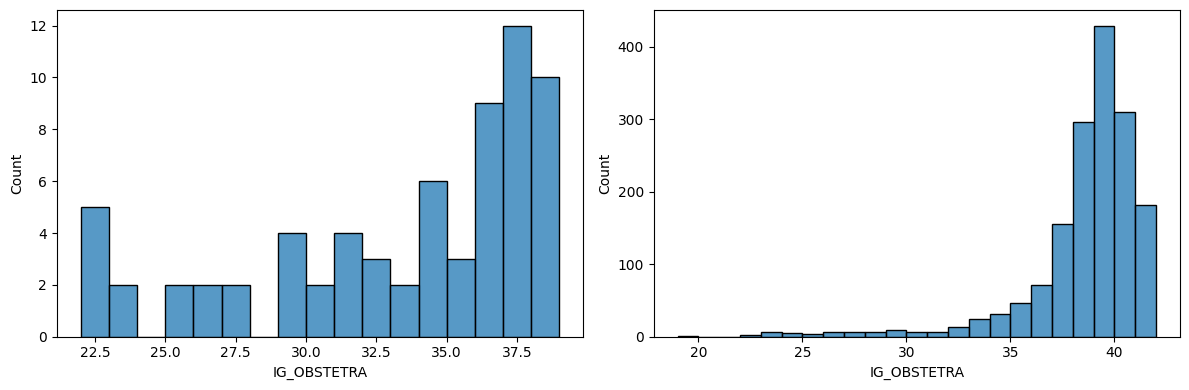

In [7]:
# 1ª ETAPA - Estatística descritiva

# Estatística descritiva - Análise dos valores medianos
medianG1 = grupo1.median()
medianG2 = grupo2.median()

print(f'Mediana do Grupo 1: {medianG1:.1f}')
print(f'Mediana do Grupo 2: {medianG2:.1f}')
print()

# _______________________________________________________________________________________
# 2º ETAPA - Realizar o teste de medianas para 2 variáveis independentes

# Teste de Mann-Whitney para variáveis independentes
# H0 = as medianas são iguais

resultado = stats.mstats.mannwhitneyu(grupo1, grupo2)
print('Teste de Mann-Whitney - 2 medianas')
print(f'p-value: {resultado.pvalue:.3f}')

## interpretação
if resultado.pvalue <= 0.05:
    print('Rejeita H0 => As medianas são diferentes!')
else:
    print('Aceita H0 => As medianas são iguais!')

# _______________________________________________________________________________________
print()
## Estatística descritiva - Análise Gráfica -> Mostrar 2 histogramas

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(grupo1, ax=ax1, binwidth=1)
sns.histplot(grupo2, ax=ax2, binwidth=1)
plt.tight_layout()

**Exemplo 2: A mediana da Idade Gestacional é a mesma entre os grupos de gestantes de alto risco e risco habitual?**

In [8]:
# Selecionar os nomes das variáveis  (IG_OBSTETRA, ALTO_RISCO)
varNumerica = 'IG_OBSTETRA'
varCategorica = 'ALTO_RISCO'

# Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[varNumerica, varCategorica])

# Separar os dois grupos pela categoria, e selecionar só a coluna numérica desejada
grupo1 = dados2[(dados2.ALTO_RISCO == 'Sim')].IG_OBSTETRA
grupo2 = dados2[(dados2.ALTO_RISCO == 'Não')].IG_OBSTETRA

Mediana do Grupo 1: 38.0
Mediana do Grupo 2: 39.0

Teste de Mann-Whitney - 2 medianas
p-value: 0.000
Rejeita H0 => As medianas são diferentes!



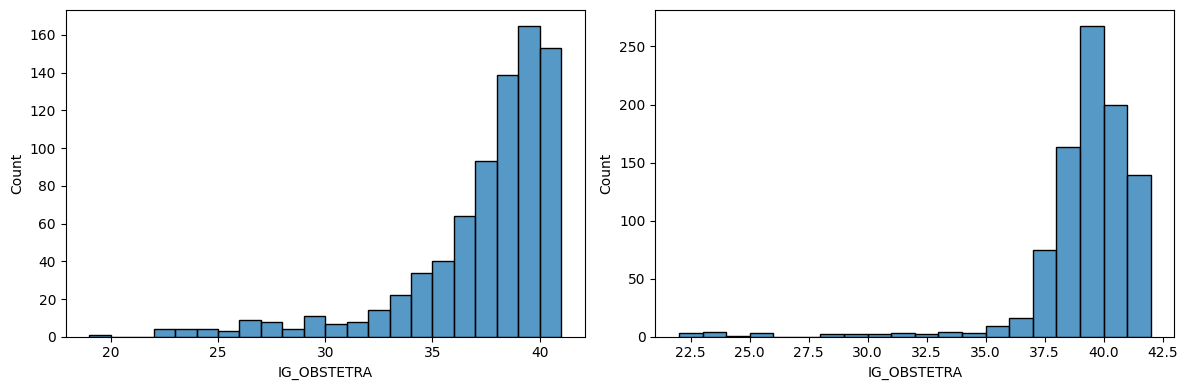

In [9]:
# 1ª ETAPA - Estatística descritiva

# Estatística descritiva - Análise dos valores medianos
medianG1 = grupo1.median()
medianG2 = grupo2.median()

print(f'Mediana do Grupo 1: {medianG1:.1f}')
print(f'Mediana do Grupo 2: {medianG2:.1f}')
print()

# _______________________________________________________________________________________
# 2º ETAPA - Realizar o teste de medianas para 2 variáveis independentes

# Teste de Mann-Whitney para variáveis independentes
# H0 = as medianas são iguais

resultado = stats.mstats.mannwhitneyu(grupo1, grupo2)
print('Teste de Mann-Whitney - 2 medianas')
print(f'p-value: {resultado.pvalue:.3f}')

# interpretação
if resultado.pvalue <= 0.05:
    print('Rejeita H0 => As medianas são diferentes!')
else:
    print('Aceita H0 => As medianas são iguais!')

# _______________________________________________________________________________________
print()
# Estatística descritiva - Análise Gráfica -> Mostrar 2 histogramas

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(grupo1, ax=ax1, binwidth=1)
sns.histplot(grupo2, ax=ax2, binwidth=1)
plt.tight_layout()

**Exemplo 3: A mediana da Idade Gestacional é a mesma entre os RNs do sexo masculino e feminino?**

In [10]:
# Selecionar os nomes das variáveis  (IG_OBSTETRA, SEXO)
varNumerica = 'IG_OBSTETRA'
varCategorica = 'SEXO'

# Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[varNumerica, varCategorica])

# Separar os dois grupos pela categoria, e selecionar só a coluna numérica desejada
grupo1 = dados2[(dados2.SEXO == 'Feminino')].IG_OBSTETRA
grupo2 = dados2[(dados2.SEXO == 'Masculino')].IG_OBSTETRA

Mediana do Grupo 1: 39.0
Mediana do Grupo 2: 39.0

Teste de Mann-Whitney - 2 medianas
p-value: 0.099
Aceita H0 => As medianas são iguais!



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

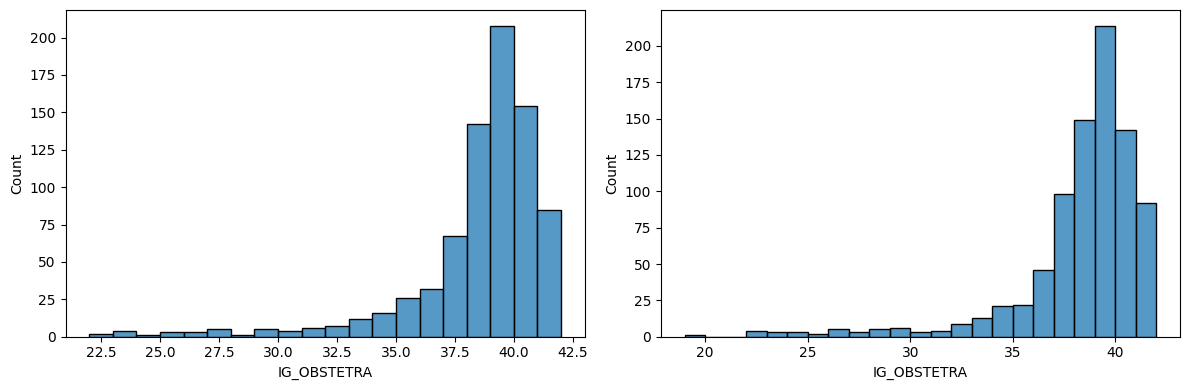

In [11]:
# 1ª ETAPA - Estatística descritiva

# Estatística descritiva - Análise dos valores medianos
medianG1 = grupo1.median()
medianG2 = grupo2.median()

print(f'Mediana do Grupo 1: {medianG1:.1f}')
print(f'Mediana do Grupo 2: {medianG2:.1f}')
print()

# _______________________________________________________________________________________
# 2º ETAPA - Realizar o teste de medianas para 2 variáveis independentes

# Teste de Mann-Whitney para variáveis independentes
# H0 = as medianas são iguais

resultado = stats.mstats.mannwhitneyu(grupo1, grupo2)
print('Teste de Mann-Whitney - 2 medianas')
print(f'p-value: {resultado.pvalue:.3f}')

# interpretação
if resultado.pvalue <= 0.05:
    print('Rejeita H0 => As medianas são diferentes!')
else:
    print('Aceita H0 => As medianas são iguais!')

# _______________________________________________________________________________________
print()
# Estatística descritiva - Análise Gráfica -> Mostrar 2 histogramas

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(grupo1, ax=ax1, binwidth=1)
sns.histplot(grupo2, ax=ax2, binwidth=1)
plt.tight_layout()

# para salvar/preparar a figura (depois baixar)
nome_arquivo = 'FiguraAtividade_6.jpg'
plt.savefig(nome_arquivo, format='jpg', dpi=300)
files.download(nome_arquivo)

Saiba mais: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.mannwhitneyu.html

# Teste Kruskal-Wallis - Variáveis independentes - três ou mais medianas

**Exemplo 1: A mediana da duração da internação é a mesma entre os RNs prematuros, termo-precoce e termo?**

In [12]:
# Selecionar os nomes das variáveis  (DURACAO_INT, IG_TERMO)
varNumerica = 'DURACAO_INT'
varCategorica = 'IG_TERMO'

# Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[varNumerica, varCategorica])

# Separar os grupos pela categoria, e selecionar só a coluna numérica desejada
grupo1 = dados2[(dados2.IG_TERMO == 'Prematuro')].DURACAO_INT
grupo2 = dados2[(dados2.IG_TERMO == 'Termo-precoce')].DURACAO_INT
grupo3 = dados2[(dados2.IG_TERMO == 'Termo')].DURACAO_INT

Mediana do Grupo 1: 3.0
Mediana do Grupo 2: 2.0
Mediana do Grupo 3: 2.0

Teste de Kruskal-Wallis - 3+ medianas
p-value: 0.000
Rejeita H0 => As medianas são diferentes!



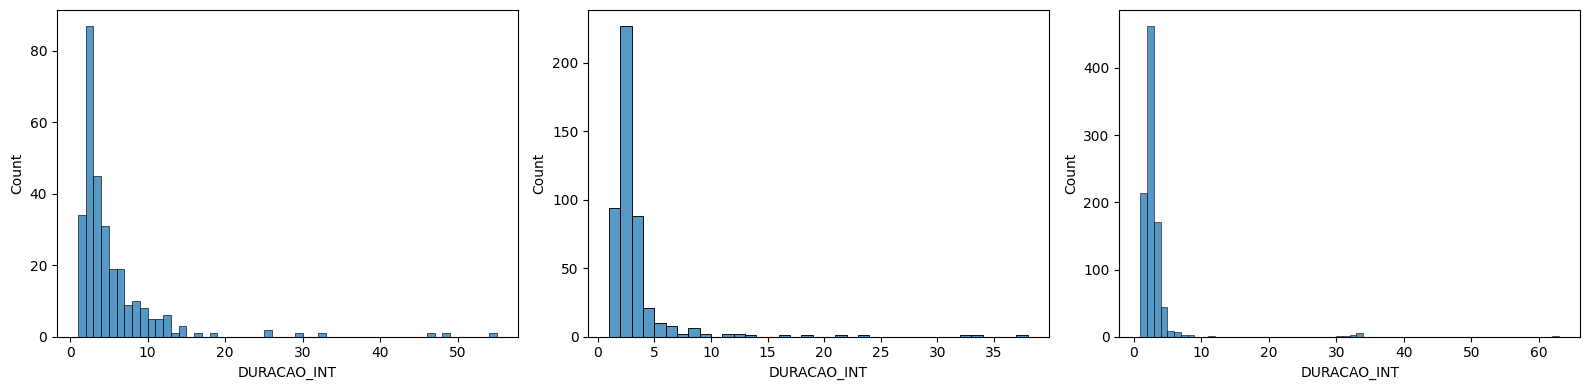

In [13]:
# 1ª ETAPA - Estatística descritiva

# Estatística descritiva - Análise dos valores medianos
medianG1 = grupo1.median()
medianG2 = grupo2.median()
medianG3 = grupo3.median()

print(f'Mediana do Grupo 1: {medianG1:.1f}')
print(f'Mediana do Grupo 2: {medianG2:.1f}')
print(f'Mediana do Grupo 3: {medianG3:.1f}')
print()

# _______________________________________________________________________________________
# 2º ETAPA - Realizar o teste de medianas para 3 ou mais variáveis independentes

# 3º realizar o teste H - Kruskal-Wallis
# H0 = as medianas são iguais

# Observação: kruskal não aceita coluna do pandas diretamente, precisa usar ".values" para pegar só valor

resultado = stats.mstats.kruskal(grupo1.values, grupo2.values, grupo3.values)
print('Teste de Kruskal-Wallis - 3+ medianas')
print(f'p-value: {resultado.pvalue:.3f}')

# interpretação
if resultado.pvalue <= 0.05:
    print('Rejeita H0 => As medianas são diferentes!')
else:
    print('Aceita H0 => As medianas são iguais!')

# _______________________________________________________________________________________
print()
# Estatística descritiva - Análise Gráfica -> Mostrar 3 histogramas

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
sns.histplot(grupo1, ax=ax1, binwidth=1)
sns.histplot(grupo2, ax=ax2, binwidth=1)
sns.histplot(grupo3, ax=ax3, binwidth=1)
plt.tight_layout()

Saiba mais: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.kruskalwallis.html

**Importante: no exemplo acima existe diferença! Agora precisamos investigar onde está a diferença!**

**Teste de Dunn - post hoc para o teste de Kruskal-Wallis**

In [14]:
# criando uma lista com os 3 grupos de valores
dados3 = [grupo1.values, grupo2.values, grupo3.values]

# executar o Dunn's test usando uma correção de Bonferonni para os p-values
# H0 = As medianas são iguais (teste de Dunn)
resultado = sp.posthoc_dunn(dados3, p_adjust = 'bonferroni')
print(resultado.round(3))

     1      2      3
1  1.0  0.000  0.000
2  0.0  1.000  0.066
3  0.0  0.066  1.000


In [ ]:
# H0 = As medianas são iguais (teste de Dunn)
# Para interpretar precisa analisar cada combinação da tabela acima

# prematuro x termo-precoce < 0.001 ==> Existe diferença (rejeita H0)
# prematuro x termo         < 0.001 ==> Existe diferença (rejeita H0)
# termo-precoce x termo     = 0.066 ==> Não existe diferença (aceita H0)

Saiba mais: https://www.statology.org/dunns-test-python/

# Teste Wilcoxon - Variáveis dependentes/pareadas (antes e após) - duas medianas

**Exemplo 1: A mediana da idade gestacional informada pelo obstetra é a mesma da informada pelo pediatra?**

In [15]:
# Selecionar os nomes das variáveis  (IG_OBSTETRA, IG_PEDIATRA)

# Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=['IG_OBSTETRA', 'IG_PEDIATRA'])

# Separar os dois grupos pela categoria, e selecionar só a coluna numérica desejada
grupo1 = dados2.IG_OBSTETRA
grupo2 = dados2.IG_PEDIATRA

In [ ]:
# 1ª ETAPA - Estatística descritiva

# Estatística descritiva - Análise dos valores medianos
medianG1 = grupo1.median()
medianG2 = grupo2.median()

print(f'Mediana do Grupo 1: {medianG1:.1f}')
print(f'Mediana do Grupo 2: {medianG2:.1f}')
print()

# mediaG1 = grupo1.mean()
# mediaG2 = grupo2.mean()
# print(f'Media do Grupo 1: {mediaG1:.10f}')
# print(f'Media do Grupo 2: {mediaG2:.10f}')
# print()

# _______________________________________________________________________________________
# 2º ETAPA - realizar o teste de medianas para VARIÁVEIS DEPENDENTES / PAREADAS / (antes e após)

# Teste de Wilcoxon para variáveis pareadas (antes e após)
# H0 = as medianas são iguais

resultado = stats.wilcoxon(grupo1, grupo2)
print('Teste de Wilcoxon - 2 medianas pareadas')
print(f'p-value: {resultado.pvalue:.3f}')

# interpretação
if resultado.pvalue <= 0.05:
    print('Rejeita H0 => As medianas são diferentes!')
else:
    print('Aceita H0 => As medianas são iguais!')

# _______________________________________________________________________________________
print()
# Estatística descritiva - Análise Gráfica -> Mostrar 2 histogramas

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(grupo1, ax=ax1, binwidth=1)
sns.histplot(grupo2, ax=ax2, binwidth=1)
plt.tight_layout()

**Exemplo 2: A mediana do Escore de Apgar dado ao 1º minuto é a mesma do valor dado ao 5º minuto de vida?**

In [16]:
# Selecionar os nomes das variáveis  (APGAR1, APGAR5)

# Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=['APGAR1', 'APGAR5'])

# Separar os dois grupos pela categoria, e selecionar só a coluna numérica desejada
grupo1 = dados2.APGAR1
grupo2 = dados2.APGAR5

Mediana do Grupo 1: 9.0
Mediana do Grupo 2: 9.0

Teste de Wilcoxon - 2 medianas pareadas
p-value: 0.000
Rejeita H0 => As medianas são diferentes!



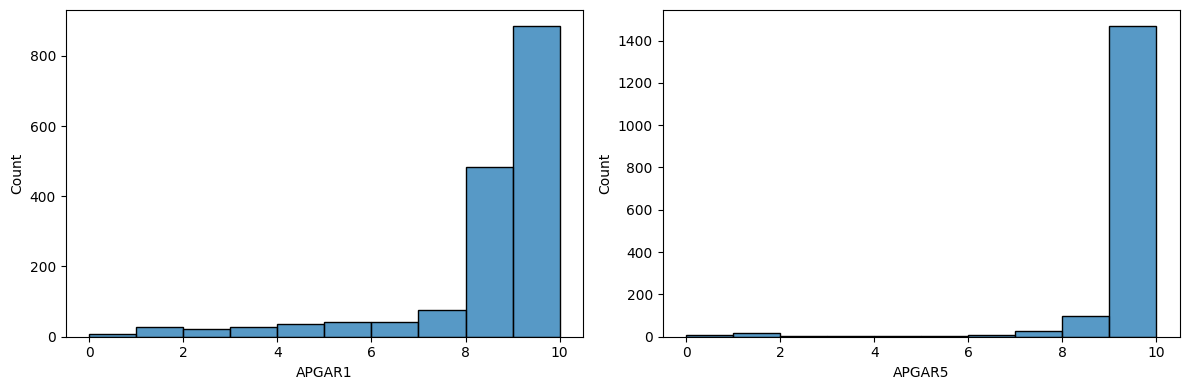

In [17]:
# 1ª ETAPA - Estatística descritiva

# Estatística descritiva - Análise dos valores medianos
medianG1 = grupo1.median()
medianG2 = grupo2.median()

print(f'Mediana do Grupo 1: {medianG1:.1f}')
print(f'Mediana do Grupo 2: {medianG2:.1f}')
print()

# _______________________________________________________________________________________
# 2º ETAPA - realizar o teste de medianas para VARIÁVEIS DEPENDENTES / PAREADAS / (antes e após)

# Teste de Wilcoxon para variáveis pareadas (antes e após)
# H0 = as medianas são iguais

resultado = stats.wilcoxon(grupo1, grupo2)
print('Teste de Wilcoxon - 2 medianas pareadas')
print(f'p-value: {resultado.pvalue:.3f}')

# interpretação
if resultado.pvalue <= 0.05:
    print('Rejeita H0 => As medianas são diferentes!')
else:
    print('Aceita H0 => As medianas são iguais!')

# _______________________________________________________________________________________
print()
# Estatística descritiva - Análise Gráfica -> Mostrar 2 histogramas

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(grupo1, ax=ax1, binwidth=1)
sns.histplot(grupo2, ax=ax2, binwidth=1)
plt.tight_layout()

Saiba mais: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html#scipy.stats.wilcoxon

# Teste Friedmann - Variáveis dependentes/pareadas (antes e após) - três ou mais medianas

**Exemplo 1: As medianas do peso no ultrassom, ao nascer e a alta são as mesmas?**

In [18]:
# Selecionar os nomes das variáveis  (PESO_US, PESO_NASCER, PESO_ALTA)

# Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=['PESO_US', 'PESO_NASCER', 'PESO_ALTA'])

# Separar os 3 grupos pela categoria, e selecionar só a coluna numérica desejada
grupo1 = dados2.PESO_US
grupo2 = dados2.PESO_NASCER
grupo3 = dados2.PESO_ALTA

Mediana do Grupo 1: 2095.0
Mediana do Grupo 2: 3090.0
Mediana do Grupo 3: 2940.0

Teste de Friedmann - 3+ medianas
p-value: 0.000
Rejeita H0 => As medianas são diferentes!



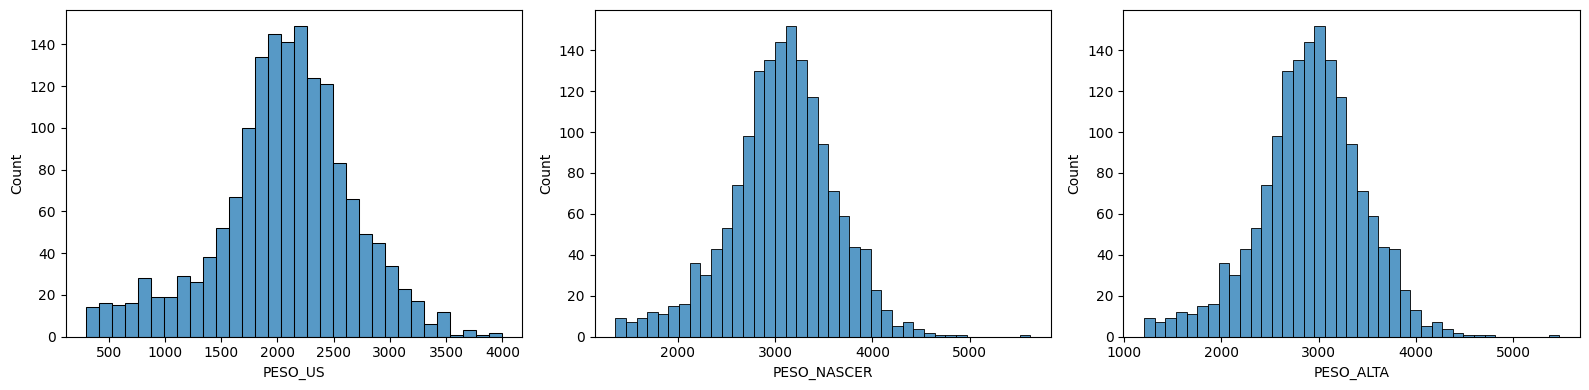

In [19]:
# 1ª ETAPA - Estatística descritiva

# Estatística descritiva - Análise dos valores medianos
medianG1 = grupo1.median()
medianG2 = grupo2.median()
medianG3 = grupo3.median()

print(f'Mediana do Grupo 1: {medianG1:.1f}')
print(f'Mediana do Grupo 2: {medianG2:.1f}')
print(f'Mediana do Grupo 3: {medianG3:.1f}')
print()

# _______________________________________________________________________________________
# 2º ETAPA - Realizar o teste de medianas para 3 ou mais variáveis independentes

# 3º realizar o teste Friedmann
# H0 = as medianas são iguais

# Observação: Friedmann não aceita coluna do pandas diretamente, precisa usar ".values" para pegar só valor

resultado = stats.mstats.friedmanchisquare(grupo1.values, grupo2.values, grupo3.values)
print('Teste de Friedmann - 3+ medianas')
print(f'p-value: {resultado.pvalue:.3f}')

# interpretação
if resultado.pvalue <= 0.05:
    print('Rejeita H0 => As medianas são diferentes!')
else:
    print('Aceita H0 => As medianas são iguais!')

# _______________________________________________________________________________________
print()
# Estatística descritiva - Análise Gráfica -> Mostrar 3 histogramas

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
sns.histplot(grupo1, ax=ax1)
sns.histplot(grupo2, ax=ax2)
sns.histplot(grupo3, ax=ax3)
plt.tight_layout()

**No exemplo acima existe diferença! Agora precisamos investigar onde está a diferença!**

**Teste de Dunn - post hoc para o teste de Friedmann**

In [20]:
# criando uma lista com os 3 grupos de valores
dados3 = [grupo1.values, grupo2.values, grupo3.values]

# executar o Dunn's test usando uma correção de Bonferonni para os p-values
resultado = sp.posthoc_dunn(dados3, p_adjust = 'bonferroni')
print(resultado.round(3))

     1    2    3
1  1.0  0.0  0.0
2  0.0  1.0  0.0
3  0.0  0.0  1.0


In [21]:
# H0 = As medianas são iguais (teste de Dunn)
# Para interpretar precisa analisar cada combinação da tabela acima

# PESO_US x PESO_NASCER   < 0.001   ==> Existe diferença (rejeita H0)
# PESO_US x PESO_ALTA     < 0.001   ==> Existe diferença (rejeita H0)
# PESO_NASCER x PESO_ALTA < 0.001   ==> Existe diferença (rejeita H0)

Saiba mais: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.friedmanchisquare.html